## Minería de Textos y Procesamiento del Lenguaje Natural

### Análisis de Datos No Estructurados

In [ ]:
import sys
sys.path

In [2]:
# Instalamos las librerías necesarias 

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
    from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize
#from twython import Twython
import time
import json

Hay una gran cantidad de datos no estructurados, como artículos de noticias, comentarios de los clientes, tweets de Twitter y muchos otros, y hay información que está ahí y que sería muy útil para analizar. Text Mining es una técnica  que nos ayuda a realizar análisis de estos datos no estructurados.

### Preprocesamiento de la Data

Usaremos los comentarios de Mad Max: Fury Road de bbc, Forbes, Guardian y la película El Piloto. Realizaremos lo siguiente en los datos

1. Eliminar la puntuación
2. Eliminar números
3. Conversión de texto a minúsculas
4. Eliminar las palabras vacías como be, the, on, etc.

Comencemos cargando los datos primero


In [4]:
data = {}

data['bbc'] = open('C:/Users/AnaMariaAp/Desktop/Machine Learning for Data Science-URP/DataSet/TextMining y NLP/bbc.txt','r',encoding="utf8").read()
data['forbes'] = open('C:/Users/AnaMariaAp/Desktop/Machine Learning for Data Science-URP/DataSet/TextMining y NLP/forbes.txt','r',encoding="utf8").read()
data['guardian'] = open('C:/Users/AnaMariaAp/Desktop/Machine Learning for Data Science-URP/DataSet/TextMining y NLP/guardian.txt','r',encoding="utf8").read()
data['moviepilot'] = open('C:/Users/AnaMariaAp/Desktop/Machine Learning for Data Science-URP/DataSet/TextMining y NLP/moviepilot.txt','r',encoding="utf8").read()

In [5]:
data

{'bbc': "When the creator of a 1970s/1980s blockbuster franchise decides to dust it off again decades later, the results can be ... well, the results can be The Phantom Menace, Prometheus, or Indiana Jones and the Kingdom of the Crystal Skull: legacy-tarnishing messes that fans try to forget. And then there's Mad Max: Fury Road. The first Mad Max film to be made by George Miller in 30 years, this belated reboot is missing its original star, Mel Gibson, and its director has spent the intervening years on such children's fare as Happy Feet and Babe: Pig in the City. You might assume, then, that Fury Road would join The Phantom Menace on the scrapheap reserved for unloved revivals. And yet, somehow, this explosive new barrage of action and eccentricity isn't only a faithful continuation of the series, it's also its exhilarating high point. When Miller made his trilogy three decades ago, it seems, he was just revving up.\n\nFor the benefit of the uninitiated, the Mad Max films are set in a

Convertiremos el texto a minúsculas

In [5]:
data.keys()

dict_keys(['bbc', 'forbes', 'guardian', 'moviepilot'])

In [6]:
# Conversion del texto a minúsculas
for k in data.keys():
    data[k] = data[k].lower()

In [7]:
print(data['bbc'][:800])

when the creator of a 1970s/1980s blockbuster franchise decides to dust it off again decades later, the results can be ... well, the results can be the phantom menace, prometheus, or indiana jones and the kingdom of the crystal skull: legacy-tarnishing messes that fans try to forget. and then there's mad max: fury road. the first mad max film to be made by george miller in 30 years, this belated reboot is missing its original star, mel gibson, and its director has spent the intervening years on such children's fare as happy feet and babe: pig in the city. you might assume, then, that fury road would join the phantom menace on the scrapheap reserved for unloved revivals. and yet, somehow, this explosive new barrage of action and eccentricity isn't only a faithful continuation of the series,


Ahora, eliminaremos la puntuación del texto

In [8]:
# Removemos los signos de punruación necesarios o los que no querramos considerar
for k in data.keys():
    data[k] = re.sub(r'[-./?!,":;()\']',' ',data[k]) 

In [9]:
print(data['bbc'][:800])

when the creator of a 1970s 1980s blockbuster franchise decides to dust it off again decades later  the results can be     well  the results can be the phantom menace  prometheus  or indiana jones and the kingdom of the crystal skull  legacy tarnishing messes that fans try to forget  and then there s mad max  fury road  the first mad max film to be made by george miller in 30 years  this belated reboot is missing its original star  mel gibson  and its director has spent the intervening years on such children s fare as happy feet and babe  pig in the city  you might assume  then  that fury road would join the phantom menace on the scrapheap reserved for unloved revivals  and yet  somehow  this explosive new barrage of action and eccentricity isn t only a faithful continuation of the series 


Eliminaremos los números del texto

In [10]:
# Removiendo números del texto
for k in data.keys():
    data[k] = re.sub('[-|0-9]',' ',data[k])

In [11]:
print(data['bbc'][:800])

when the creator of a     s     s blockbuster franchise decides to dust it off again decades later  the results can be     well  the results can be the phantom menace  prometheus  or indiana jones and the kingdom of the crystal skull  legacy tarnishing messes that fans try to forget  and then there s mad max  fury road  the first mad max film to be made by george miller in    years  this belated reboot is missing its original star  mel gibson  and its director has spent the intervening years on such children s fare as happy feet and babe  pig in the city  you might assume  then  that fury road would join the phantom menace on the scrapheap reserved for unloved revivals  and yet  somehow  this explosive new barrage of action and eccentricity isn t only a faithful continuation of the series 


Eliminaremos también las palabras vacías que son palabras comunes como la nuestra, la suya, que, etc.

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Andre
[nltk_data]     Chavez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
data.keys()

dict_keys(['bbc', 'forbes', 'guardian', 'moviepilot'])

In [15]:
data['bbc'].split()

['when',
 'the',
 'creator',
 'of',
 'a',
 's',
 's',
 'blockbuster',
 'franchise',
 'decides',
 'to',
 'dust',
 'it',
 'off',
 'again',
 'decades',
 'later',
 'the',
 'results',
 'can',
 'be',
 'well',
 'the',
 'results',
 'can',
 'be',
 'the',
 'phantom',
 'menace',
 'prometheus',
 'or',
 'indiana',
 'jones',
 'and',
 'the',
 'kingdom',
 'of',
 'the',
 'crystal',
 'skull',
 'legacy',
 'tarnishing',
 'messes',
 'that',
 'fans',
 'try',
 'to',
 'forget',
 'and',
 'then',
 'there',
 's',
 'mad',
 'max',
 'fury',
 'road',
 'the',
 'first',
 'mad',
 'max',
 'film',
 'to',
 'be',
 'made',
 'by',
 'george',
 'miller',
 'in',
 'years',
 'this',
 'belated',
 'reboot',
 'is',
 'missing',
 'its',
 'original',
 'star',
 'mel',
 'gibson',
 'and',
 'its',
 'director',
 'has',
 'spent',
 'the',
 'intervening',
 'years',
 'on',
 'such',
 'children',
 's',
 'fare',
 'as',
 'happy',
 'feet',
 'and',
 'babe',
 'pig',
 'in',
 'the',
 'city',
 'you',
 'might',
 'assume',
 'then',
 'that',
 'fury',
 'road

In [14]:
# Removiendo Stopwords
for k in data.keys():
    data[k] = data[k].split()
    #data[k] = data[k]

stopwords_list = stopwords.words('english')
stopwords_list = stopwords_list + ['mad','max','film','fury','miller','road']

for k in data.keys():
    data[k] = [ w for w in data[k] if not w in stopwords_list ]
    
print(data['bbc'][:80])

['creator', 'blockbuster', 'franchise', 'decides', 'dust', 'decades', 'later', 'results', 'well', 'results', 'phantom', 'menace', 'prometheus', 'indiana', 'jones', 'kingdom', 'crystal', 'skull', 'legacy', 'tarnishing', 'messes', 'fans', 'try', 'forget', 'first', 'made', 'george', 'years', 'belated', 'reboot', 'missing', 'original', 'star', 'mel', 'gibson', 'director', 'spent', 'intervening', 'years', 'children', 'fare', 'happy', 'feet', 'babe', 'pig', 'city', 'might', 'assume', 'would', 'join', 'phantom', 'menace', 'scrapheap', 'reserved', 'unloved', 'revivals', 'yet', 'somehow', 'explosive', 'new', 'barrage', 'action', 'eccentricity', 'faithful', 'continuation', 'series', 'also', 'exhilarating', 'high', 'point', 'made', 'trilogy', 'three', 'decades', 'ago', 'seems', 'revving', 'benefit', 'uninitiated', 'films']


In [15]:
print(data['bbc'])

['creator', 'blockbuster', 'franchise', 'decides', 'dust', 'decades', 'later', 'results', 'well', 'results', 'phantom', 'menace', 'prometheus', 'indiana', 'jones', 'kingdom', 'crystal', 'skull', 'legacy', 'tarnishing', 'messes', 'fans', 'try', 'forget', 'first', 'made', 'george', 'years', 'belated', 'reboot', 'missing', 'original', 'star', 'mel', 'gibson', 'director', 'spent', 'intervening', 'years', 'children', 'fare', 'happy', 'feet', 'babe', 'pig', 'city', 'might', 'assume', 'would', 'join', 'phantom', 'menace', 'scrapheap', 'reserved', 'unloved', 'revivals', 'yet', 'somehow', 'explosive', 'new', 'barrage', 'action', 'eccentricity', 'faithful', 'continuation', 'series', 'also', 'exhilarating', 'high', 'point', 'made', 'trilogy', 'three', 'decades', 'ago', 'seems', 'revving', 'benefit', 'uninitiated', 'films', 'set', 'lawless', 'post', 'apocalyptic', 'dystopia', 'oil', 'scarce', 'bands', 'scavengers', 'career', 'around', 'souped', 'stock', 'cars', 'given', 'future', 'world', 'consist

## Creando Nuestra Primera Nube de Palabras

In [16]:
# Revisando la información
#data['bbc']

In [18]:
# Uniendo el contenido de una de nuestras grandes temáticas, unir todas las palabras mediante un join
' '.join(data['bbc'])

'creator blockbuster franchise decides dust decades later results well results phantom menace prometheus indiana jones kingdom crystal skull legacy tarnishing messes fans try forget first made george years belated reboot missing original star mel gibson director spent intervening years children fare happy feet babe pig city might assume would join phantom menace scrapheap reserved unloved revivals yet somehow explosive new barrage action eccentricity faithful continuation series also exhilarating high point made trilogy three decades ago seems revving benefit uninitiated films set lawless post apocalyptic dystopia oil scarce bands scavengers career around souped stock cars given future world consists largely sand b petrol short supply odd populace devoted internal combustion engine franchise always absurd gusto flair commits absurdity makes exciting welcome land everyone sports punk hairdos leather bondage gear people named aunt entity dr dealgood matter course things extravagantly cra

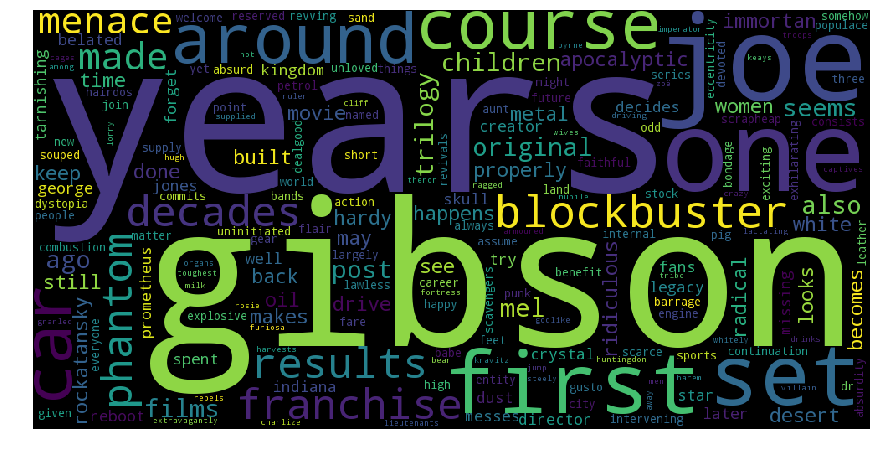

In [20]:
# Realizamos la nube de palabras o wordcloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(data['bbc']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Viendo el Word Cloud anterior, podemos ver que hay una mención sobre el tiempo entre la película anterior y la actual. El artículo habla de Mel Gibson, los autos y el villano Immortan Joe, ya que son las palabras clave que aparecen con mayor frecuencia. También se enfatiza en los diferentes aspectos de la película dada por la palabra clave "uno"

Ahora veamos a Forbes.

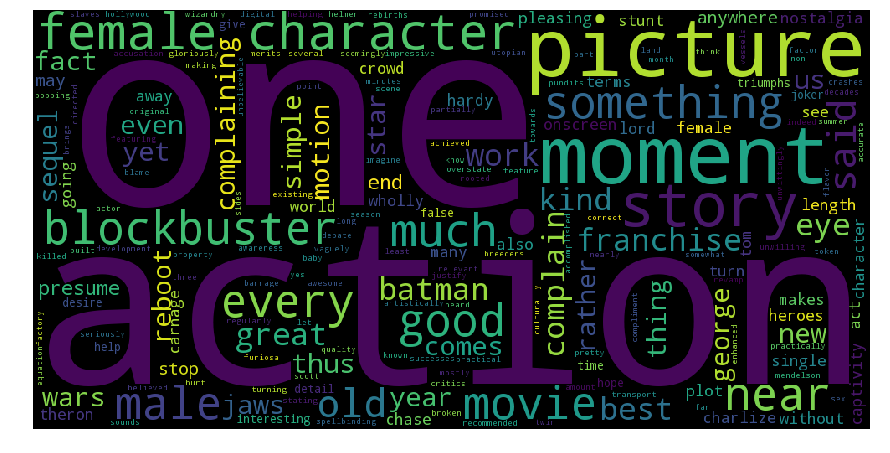

In [19]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(data['forbes']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Forbes habla más sobre los personajes femeninos.

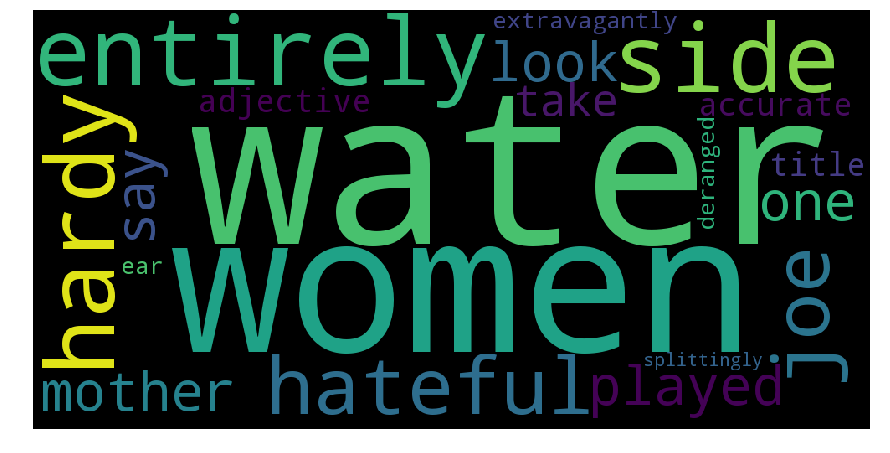

In [22]:
wordcloud = WordCloud(width = 1000, height = 500,max_words =20).generate(' '.join(data['guardian']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

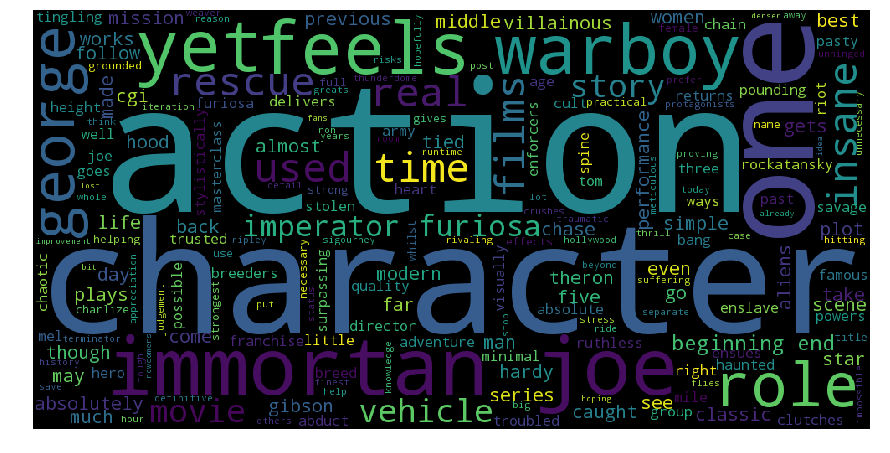

In [23]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(data['moviepilot']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

La película El piloto tiene énfasis en inmortan joe, los personajes en general y la forma en que los niños se muestran en la película.

In [23]:
# Revisar : https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html